In [13]:
import pandas as pd
import datetime 
import glob
import matplotlib.pyplot as plt

In [2]:
path ='/Users/Tanya/Desktop/DataIncubatorChallenge/tfl/usage-stats/'
filenames = glob.glob(path + "*2019.csv")

dfs = []
for filename in filenames:
    print(filename)
    dfs.append(pd.read_csv(filename,parse_dates=['Start Date','End Date']))

# Concatenate all data into one DataFrame

df = pd.concat(dfs, ignore_index=True)

/Users/Tanya/Desktop/DataIncubatorChallenge/tfl/usage-stats/179JourneyDataExtract11Sep2019-17Sep2019.csv
/Users/Tanya/Desktop/DataIncubatorChallenge/tfl/usage-stats/190JourneyDataExtract27Nov2019-03Dec2019.csv
/Users/Tanya/Desktop/DataIncubatorChallenge/tfl/usage-stats/176JourneyDataExtract21Aug2019-27Aug2019.csv
/Users/Tanya/Desktop/DataIncubatorChallenge/tfl/usage-stats/184JourneyDataExtract16Oct2019-22Oct2019.csv
/Users/Tanya/Desktop/DataIncubatorChallenge/tfl/usage-stats/193JourneyDataExtract18Dec2019-24Dec2019.csv
/Users/Tanya/Desktop/DataIncubatorChallenge/tfl/usage-stats/156JourneyDataExtract03Apr2019-09Apr2019.csv
/Users/Tanya/Desktop/DataIncubatorChallenge/tfl/usage-stats/171JourneyDataExtract17Jul2019-23Jul2019.csv
/Users/Tanya/Desktop/DataIncubatorChallenge/tfl/usage-stats/154JourneyDataExtract20Mar2019-26Mar2019.csv
/Users/Tanya/Desktop/DataIncubatorChallenge/tfl/usage-stats/159JourneyDataExtract24Apr2019-30Apr2019.csv
/Users/Tanya/Desktop/DataIncubatorChallenge/tfl/usage-s

In [3]:
df['start_hour']=df['Start Date'].dt.hour
df['end_hour']=df['End Date'].dt.hour
df['start_minute']=df['Start Date'].dt.minute
df['end_minute']=df['End Date'].dt.minute
df['start_year'] = df['Start Date'].apply(lambda x: x.year)
df['end_year'] = df['End Date'].apply(lambda x: x.year)
df['start_month'] = df['Start Date'].apply(lambda x: x.month)
df['end_month'] = df['End Date'].apply(lambda x: x.month)
df['start_date'] = df['Start Date'].apply(lambda x: x.day)
df['end_date'] = df['End Date'].apply(lambda x: x.day)


In [129]:
df['isweekday'] = df['Start Date'].apply(lambda x: x.weekday() < 5)

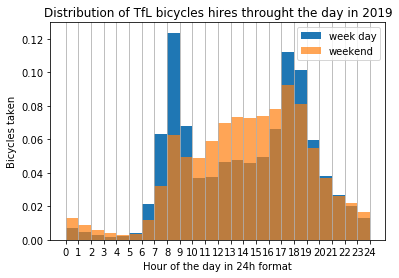

In [130]:
df['start_hour'][df['isweekday']].plot.hist(bins=range(25), density=True, alpha=1, label='week day',title='Distribution of TfL bicycles hires throught the day in 2019')
ax = df['start_hour'][df['isweekday'] == False].plot.hist(bins=range(25), density=True, alpha=0.7, label='weekend')
plt.legend(loc='upper right')
ax.set_xlabel("Hour of the day in 24h format")
ax.set_ylabel("Bicycles taken")
plt.xticks(range(25))
ax.grid(axis='x')


In [131]:
df_start_am_weekdays=df[['StartStation Name','isweekday']][(df['start_hour']>=7) & (df['start_hour']<=9)&df['isweekday']]
df_start_am_weekdays = df_start_am_weekdays.rename(columns={'StartStation Name': 'Station Name'}).groupby(['Station Name']).count()
df_start_am_weekdays = df_start_am_weekdays.sort_values('isweekday', ascending=False)[:10]


In [132]:
df_end_pm_weekdays=df[['EndStation Name','isweekday']][(df['end_hour']>=17) & (df['end_hour']<=18)&df['isweekday']]
df_end_pm_weekdays = df_end_pm_weekdays.rename(columns={'EndStation Name': 'Station Name'}).groupby(['Station Name']).count()

In [133]:
df_start_end_weekdays = df_start_am_weekdays.join(df_end_pm_weekdays, on='Station Name', lsuffix='AM', rsuffix='PM')
df_start_end_weekdays = df_start_end_weekdays.rename(columns={'isweekdayAM': 'Out AM', 'isweekdayPM': 'In PM'})


Text(0.5, 0, 'Number of bicycles')

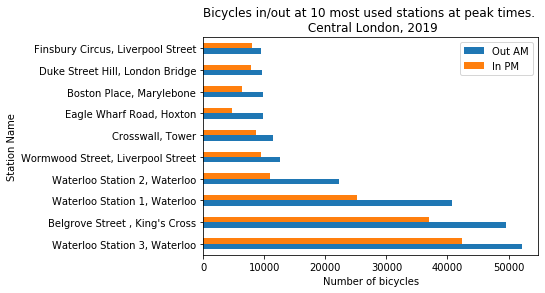

In [144]:
hbar_plot = df_start_end_weekdays.plot.barh(title='Bicycles in/out at 10 most used stations at peak times. \n Central London, 2019')
hbar_plot.set_xlabel("Number of bicycles")
